# Capstone Project Title -  Insurance Customer Response/Churn Prediction

## Project Description:

This project aims to enhance the understanding of customer behavior and improve the policy sales process in the insurance industry. By leveraging machine learning, the project seeks to predict customer responses to insurance policy offers based on various customer and policy characteristics. The goal is to develop a robust machine learning model that accurately forecasts customer responses, enabling improved targeted marketing, optimized sales channel strategies, and increased efficiency in the policy sales process.

Description: Contains customer information for a vehicle insurance to predict customer churn.
Columns: Includes customer details including age, vehicle age, premium, sales channel and so on.
Purpose: Used for customer churn analysis,understanding the customer behaviour and retention strategies.
Applications: Churn prediction, customer satisfaction analysis, and targeted marketing.
Analysis Tasks: EDA, data preprocessing, ML model building, evaluation, and monitoring.
Relevance: A practical dataset for real-world data science and customer relationship management scenarios.

## Libraries

## Dataset Description:

In [266]:
#Pandas and  Numpy for data manipulation
import pandas as pd
import numpy as np

#Matplotlib and Seaborn for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#Import the necessary libraries for model building and evaluation through metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import plot_tree
import pydotplus
from sklearn import metrics
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

Columns: 
1.	id: unique identifier for each record
2.	Gender: Gender of the policyholder
3.	Age: Age of the policyholder
4.	Driving_License: Indicates if the person has a driving license
5.	Region_Code: Code representing the geographic region
6.	Previously_Insured: Whether the person was previously insured
7.	Vehicle_Age: Age of the vehicle
8.	Vehicle_Damage: Indicates if the vehicle has been damaged
9.	Annual_Premium: The yearly insurance premium amount
10.	Policy_Sales_Channel: The channel through which the policy was sold
11.	Vintage: length of time as a customer or policy age
12.	Response: Indicating policy renewal or claim filing


In [269]:
#note: I would use the word churn wherever possible

## Step 1: Data Loading

In [272]:
df= pd.read_csv("C:/Users/yuggy/Documents/BIA Exercises-1/Capstone Project/data (project).csv")

## Step 2: Data Preprocessing and Cleaning

Why Data Preprocessing? The Data we use should not be biased or noisy. Data Preprocessing is important because it keeps the Data consitent and improves model accuracy.This process ultimately gives a way to the algorithm for a clean and meaningful outcome. In realy life, the industry always expects for a clean and neat model output which would be useful in the future for the customer.

#### 2.1 Understand the Dataset: As a first step in Data preprocessing, it is necessary to understand the structure of the Data(df)

In [277]:
df.shape #To check the number of rows and columns

(381109, 12)

In [279]:
df.head(10)  #To get the first 10 rows from the df dataset for viewing how the data looks accross rows and columns

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [281]:
df.describe() #To get the statistical value of each columns

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [283]:
df.info() #To determine the null count and Data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [285]:
df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [287]:
df.isnull().sum() #To identify the no. of null values in each columns

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [289]:
df.duplicated().sum() #To indentify if there are any duplicates in the dataset

0

In [291]:
df1 = pd.DataFrame(df) #Saving the Data in a Data Frame

In [293]:
df1.to_csv("exported_dataset.csv", index=False)

In [294]:
df1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [295]:
#take a copy of the Dataframe for model building and further preprocessing
df2 = df1.copy()  
df2.head()       #df2 gets modified due to the encoding did in the following steps

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## Step 3: EDA for Categorical features and Encoding

#### 3.1 Barplot - Gender VS Reponse (Churn)

In [432]:
#count plot (grouped bar chart) for checking the proportions

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

#to convert and represent for a clear understanding of Response as YES or NO
df2['Response_Label'] = df2['Response'].map({0: 'No', 1: 'Yes'})

sns.countplot(data=df2, x='Gender', hue='Response_Label', palette='Set2')

# Add labels and title
plt.title('Response Pattern by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Response/Churn')
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `Gender` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

#### 3.2 Proportional Stacked Bar Chart : Response VS Gender

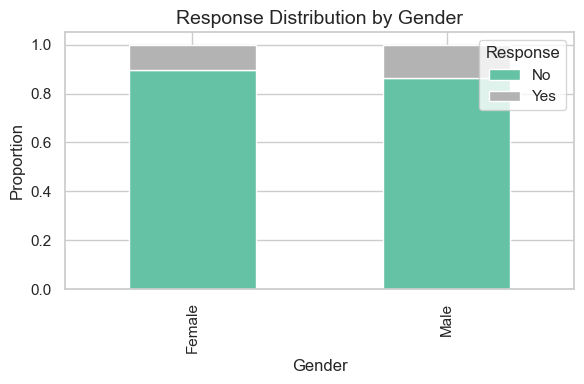

In [424]:
#This chart displays the proportion of responses distributed among Gender category
sns.set(style="whitegrid")
gender_response = pd.crosstab(df1['Gender'], df2['Response'], normalize='index')
gender_response.columns = ['No', 'Yes'] 
gender_response.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='Set2')



plt.title('Response Distribution by Gender', fontsize=14)
plt.ylabel('Proportion')
plt.xlabel('Gender')
plt.legend(title='Response', loc='upper right')
plt.tight_layout()
plt.savefig("Response Distribution by Gender", dpi=300, bbox_inches='tight')
plt.show()

#### 3.3 Barplot - Vehicle Age VS Reponse (Churn)

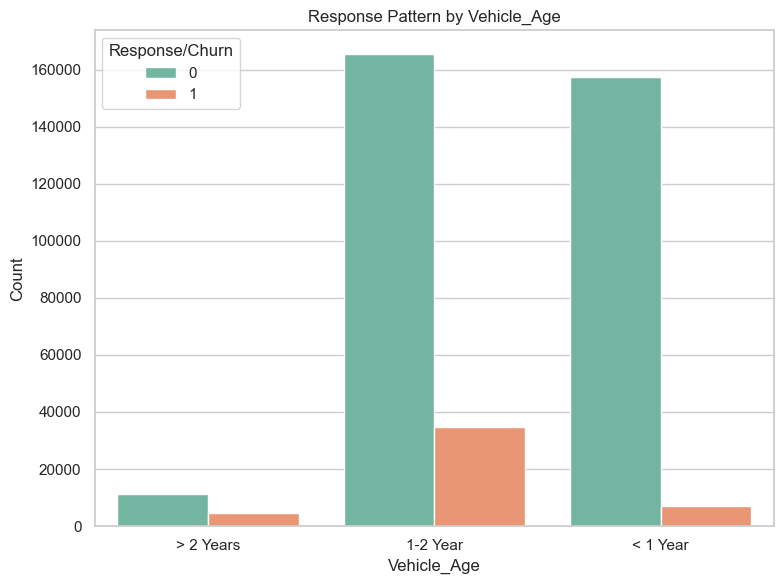

In [426]:
#count plot (grouped bar chart) for checking the proportions
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

sns.countplot(data=df1, x='Vehicle_Age', hue='Response', palette='Set2')
df2['Response_Label'] = df2['Response'].map({0: 'No', 1: 'Yes'})

# Add labels and title
plt.title('Response Pattern by Vehicle_Age')
plt.xlabel('Vehicle_Age')
plt.ylabel('Count')
plt.legend(title='Response/Churn')
plt.tight_layout()
plt.savefig("Response Pattern by Vehicle_Age", dpi=300, bbox_inches='tight')
plt.show()

In [306]:
df2.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
Response_Label               2
dtype: int64

In [307]:
df2.shape

(381109, 13)

#### Ordinal Encoding

In [310]:
df2['Vehicle_Age'] = df2['Vehicle_Age'].replace({
    '> 2 Years': 2,
    '1-2 Year': 1,
    '< 1 Year': 0
})                                #Ordinal encoding for vehicle age

In [312]:
df2.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Response_Label
0,1,Male,44,1,28.0,0,2,Yes,40454.0,26.0,217,1,Yes
1,2,Male,76,1,3.0,0,1,No,33536.0,26.0,183,0,No
2,3,Male,47,1,28.0,0,2,Yes,38294.0,26.0,27,1,Yes
3,4,Male,21,1,11.0,1,0,No,28619.0,152.0,203,0,No
4,5,Female,29,1,41.0,1,0,No,27496.0,152.0,39,0,No


#### One Hot Encoding

In [314]:
#One hot encoding for Gender and Vehicle_Damage
gender_dummies = pd.get_dummies(df1['Gender'], prefix='Gender', drop_first=True)
damage_dummies = pd.get_dummies(df1['Vehicle_Damage'], prefix='Vehicle_Damage', drop_first=True)

#combine with the existing (df1) dataframe
df2 = pd.concat([df1, gender_dummies, damage_dummies], axis=1)

In [315]:
df2.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Damage_Yes
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,True,True
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,True,False
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,True,True
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,True,False
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,False,False


In [316]:
#Drop the original categorical(non encoded) columns
df2.drop(['Gender', 'Vehicle_Damage'], axis=1, inplace=True)

In [319]:
df2.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Damage_Yes
0,1,44,1,28.0,0,> 2 Years,40454.0,26.0,217,1,True,True
1,2,76,1,3.0,0,1-2 Year,33536.0,26.0,183,0,True,False
2,3,47,1,28.0,0,> 2 Years,38294.0,26.0,27,1,True,True
3,4,21,1,11.0,1,< 1 Year,28619.0,152.0,203,0,True,False
4,5,29,1,41.0,1,< 1 Year,27496.0,152.0,39,0,False,False


In [322]:
#rename the columns gender and vehicle_damage columns with new names
df2.rename(columns={'Gender_Male': 'Gender_Encoded',
                    'Vehicle_Damage_Yes': 'Vehicle_Damage_Encoded'
                   
}, inplace=True)

In [326]:
df2.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Encoded,Vehicle_Damage_Encoded
0,1,44,1,28.0,0,> 2 Years,40454.0,26.0,217,1,True,True
1,2,76,1,3.0,0,1-2 Year,33536.0,26.0,183,0,True,False
2,3,47,1,28.0,0,> 2 Years,38294.0,26.0,27,1,True,True
3,4,21,1,11.0,1,< 1 Year,28619.0,152.0,203,0,True,False
4,5,29,1,41.0,1,< 1 Year,27496.0,152.0,39,0,False,False


### Mean Encoding

In [332]:
#Mean encoding for Policy_Sales_Channel since it has encoded IDs
channel_mean = df2.groupby('Policy_Sales_Channel')['Response'].mean()
df2['Policy_Sales_Channel_encoded'] = df1['Policy_Sales_Channel'].map(channel_mean)

In [334]:
df2.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Encoded,Vehicle_Damage_Encoded,Policy_Sales_Channel_encoded
0,1,44,1,28.0,0,> 2 Years,40454.0,26.0,217,1,True,True,0.199385
1,2,76,1,3.0,0,1-2 Year,33536.0,26.0,183,0,True,False,0.199385
2,3,47,1,28.0,0,> 2 Years,38294.0,26.0,27,1,True,True,0.199385
3,4,21,1,11.0,1,< 1 Year,28619.0,152.0,203,0,True,False,0.028624
4,5,29,1,41.0,1,< 1 Year,27496.0,152.0,39,0,False,False,0.028624


In [336]:
df2.shape

(381109, 13)

To confirm if the columns have any junk values or null, the following steps needs to be followed:

In [339]:
Unique_Age= df2['Age'].unique()
nUnique_Age= df2['Age'].nunique()
nUnique_Age

66

In [341]:
Unique_Age

array([44, 76, 47, 21, 29, 24, 23, 56, 32, 41, 71, 37, 25, 42, 60, 65, 49,
       34, 51, 26, 57, 79, 48, 45, 72, 30, 54, 27, 38, 22, 78, 20, 39, 62,
       58, 59, 63, 50, 67, 77, 28, 69, 52, 31, 33, 43, 36, 53, 70, 46, 55,
       40, 61, 75, 64, 35, 66, 68, 74, 73, 84, 83, 81, 80, 82, 85],
      dtype=int64)

In [343]:
pd.DataFrame(df['Annual_Premium'].unique()).to_csv('C:\\Users\\yuggy\\downloads\\unique_Annual_premium.csv')

In [345]:
pwd

'C:\\Users\\yuggy\\Downloads'

In [347]:
Value_counts_Age= df2['Age'].value_counts(ascending=True)
print(Value_counts_Age)

Age
85       11
84       11
83       22
82       29
81       56
      ...  
21    16457
25    20636
22    20964
23    24256
24    25960
Name: count, Length: 66, dtype: int64


In [349]:
Value_counts_Annualpremium = df2['Annual_Premium'].value_counts(ascending=True)
print(Value_counts_Annualpremium)

Annual_Premium
69845.0        1
13294.0        1
60613.0        1
57476.0        1
64967.0        1
           ...  
38287.0       38
45179.0       38
39008.0       41
69856.0      140
2630.0     64877
Name: count, Length: 48838, dtype: int64


In [351]:
from scipy import stats 

In [353]:
#finding outliers within columns

In [355]:
Outlier_in_AP=['Annual_Premium']  #Detecting outlier in Annual Premium using IQR

q1 = df2['Annual_Premium'].quantile(0.25)
q3 = df2['Annual_Premium'].quantile(0.75)

iqr=q3-q1 
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
outliers = df2[(df2['Annual_Premium'] < lower_bound) | (df2['Annual_Premium'] > upper_bound)]
print("Lower_bound:",lower_bound)
print("Upper_bound:",upper_bound)
print("Outliers:")
print(outliers[['Annual_Premium']])

Lower_bound: 1912.5
Upper_bound: 61892.5
Outliers:
        Annual_Premium
25             61964.0
37             76251.0
67             66338.0
139            62164.0
149            76651.0
...                ...
380959         61909.0
380998        101664.0
381035         62889.0
381047         71915.0
381079         69845.0

[10320 rows x 1 columns]


In [357]:
print(len(outliers))

10320


From the above analysis, we can come to a conclusion that the Data does not have any duplicates and null values.

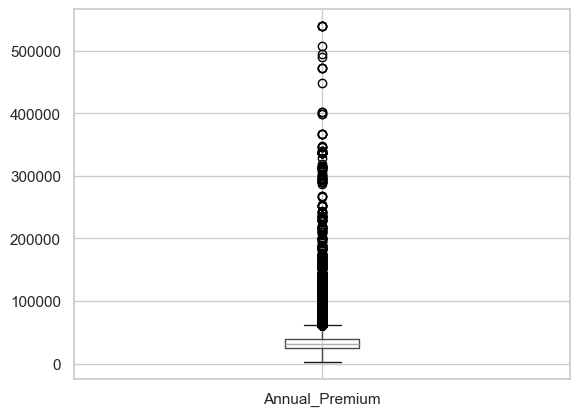

In [360]:
df2.boxplot(column='Annual_Premium')   #displaying the outliers of Annual_Premium feature by a boxplot
plt.show()

## Step 4: EDA for Numerical features

### 4.1 Histogram for counts accross numerical categories


Plotting histogram for: Age


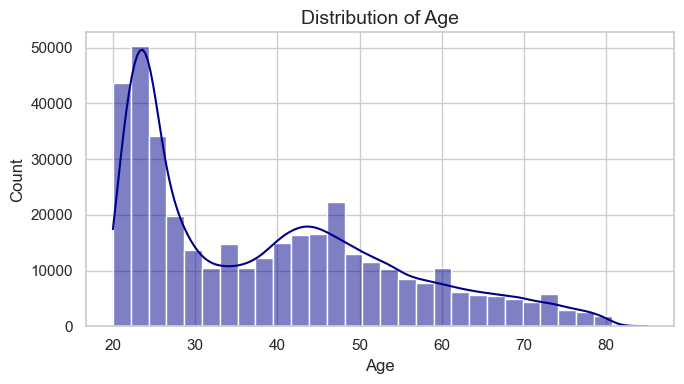


Plotting histogram for: Vehicle_Age


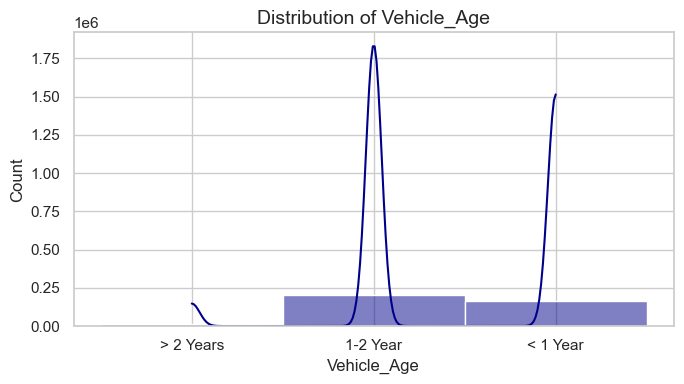


Plotting histogram for: Gender_Encoded


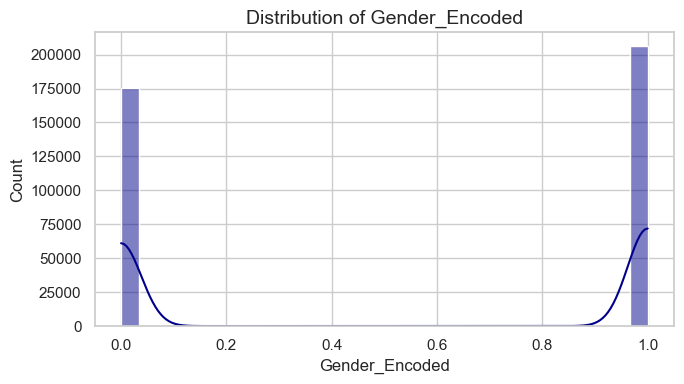


Plotting histogram for: Vehicle_Damage_Encoded


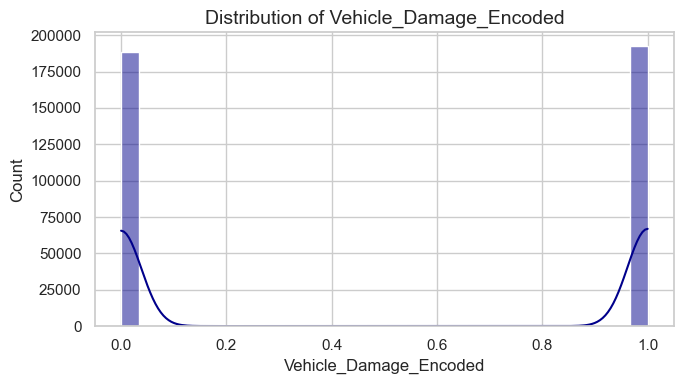


Plotting histogram for: Annual_Premium


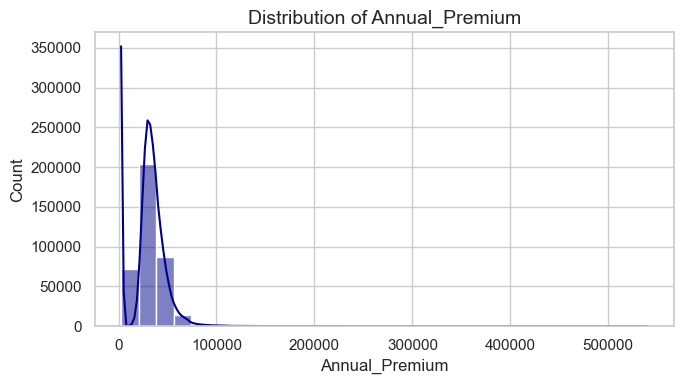


Plotting histogram for: Vintage


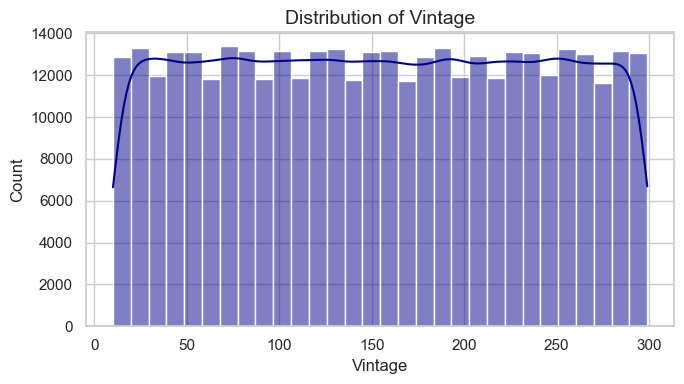

In [364]:
#plotting a histogram for continuous numeric values
numerical_cols = ['Age', 'Vehicle_Age','Gender_Encoded','Vehicle_Damage_Encoded', 'Annual_Premium', 'Vintage']
for col in numerical_cols:
    print(f"\nPlotting histogram for: {col}")
    plt.figure(figsize=(7, 4))
    sns.histplot(df2[col], bins=30, kde=True, color='darkblue')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

In [365]:
df2['Vehicle_Age'] = df2['Vehicle_Age'].replace({
    '> 2 Years': 2,
    '1-2 Year': 1,
    '< 1 Year': 0
})                                #Ordinal encoding for vehicle age
df2.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Encoded,Vehicle_Damage_Encoded,Policy_Sales_Channel_encoded
0,1,44,1,28.0,0,2,40454.0,26.0,217,1,True,True,0.199385
1,2,76,1,3.0,0,1,33536.0,26.0,183,0,True,False,0.199385
2,3,47,1,28.0,0,2,38294.0,26.0,27,1,True,True,0.199385
3,4,21,1,11.0,1,0,28619.0,152.0,203,0,True,False,0.028624
4,5,29,1,41.0,1,0,27496.0,152.0,39,0,False,False,0.028624


In [366]:
df2.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Encoded,Vehicle_Damage_Encoded,Policy_Sales_Channel_encoded
0,1,44,1,28.0,0,2,40454.0,26.0,217,1,True,True,0.199385
1,2,76,1,3.0,0,1,33536.0,26.0,183,0,True,False,0.199385
2,3,47,1,28.0,0,2,38294.0,26.0,27,1,True,True,0.199385
3,4,21,1,11.0,1,0,28619.0,152.0,203,0,True,False,0.028624
4,5,29,1,41.0,1,0,27496.0,152.0,39,0,False,False,0.028624


In [367]:
df2['Gender_Encoded'] = df2['Gender_Encoded'].astype(int)
df2.dtypes

id                                int64
Age                               int64
Driving_License                   int64
Region_Code                     float64
Previously_Insured                int64
Vehicle_Age                       int64
Annual_Premium                  float64
Policy_Sales_Channel            float64
Vintage                           int64
Response                          int64
Gender_Encoded                    int32
Vehicle_Damage_Encoded             bool
Policy_Sales_Channel_encoded    float64
dtype: object

### 4.2 Boxplot: Target VS Selected Features

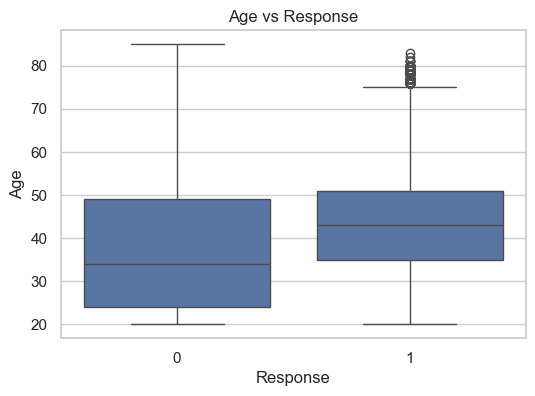

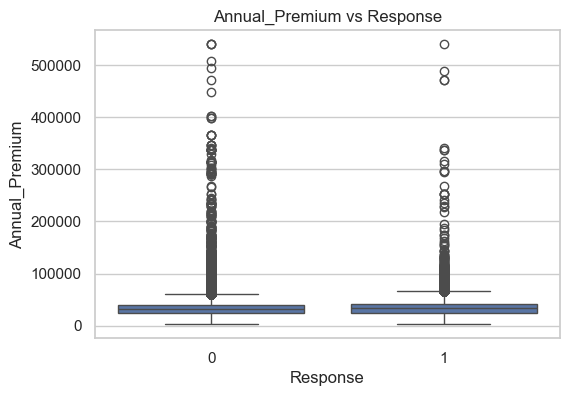

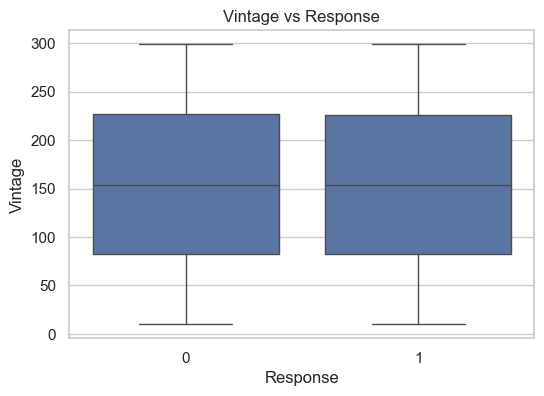

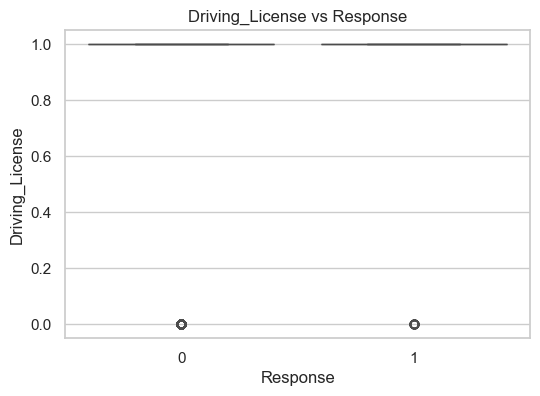

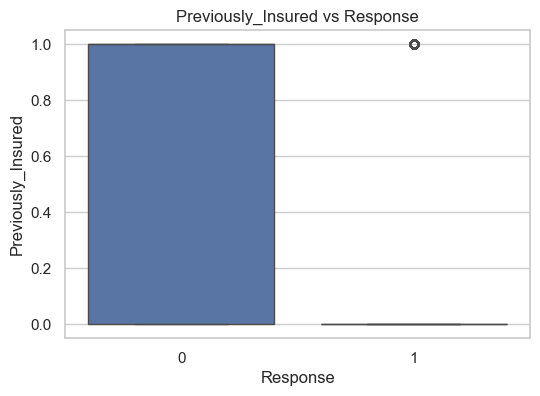

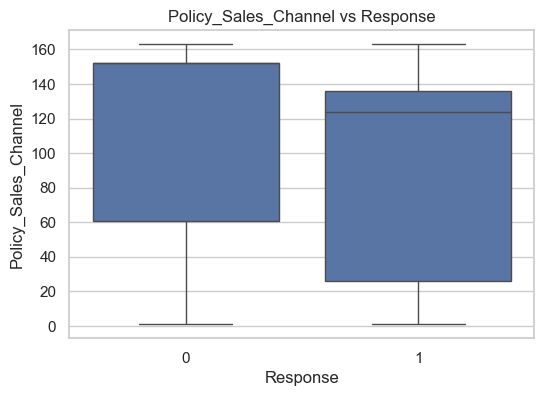

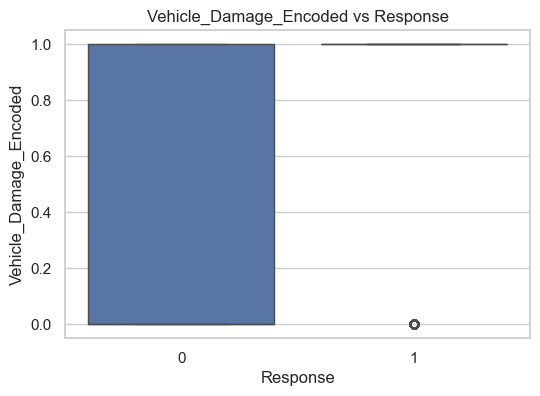

In [369]:
numerical_features = ['Age', 'Annual_Premium', 'Vintage','Driving_License','Previously_Insured','Policy_Sales_Channel','Vehicle_Damage_Encoded']

for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Response', y=col, data=df2)
    plt.title(f'{col} vs Response')
    plt.show()

### 4.3 Heatmap for correlation 

In [371]:
#Correlation heatmap between columns that might me correlated. 
#Create a heatmamp within the related numeric values- Previously_Insured, Age, Annual_Premium

In [372]:
# Calculate correlation matrix
heatmap_columns= ['Previously_Insured', 'Age', 'Annual_Premium','Vintage', 'Vehicle_Damage_Encoded','Vehicle_Age','Policy_Sales_Channel_encoded']
correlation_matrix = df2[heatmap_columns].corr()
correlation_matrix

,Previously_Insured,Age,Annual_Premium,Vintage,Vehicle_Damage_Encoded,Vehicle_Age,Policy_Sales_Channel_encoded
Previously_Insured,1.000000,-0.254682,0.004269,0.002537,-0.824143,-0.380873,-0.418471
Age,-0.254682,1.000000,0.067507,-0.001264,0.267534,0.765790,0.636941
Annual_Premium,0.004269,0.067507,1.000000,-0.000608,0.009349,0.041580,0.000340
Vintage,0.002537,-0.001264,-0.000608,1.000000,-0.002064,-0.001892,-0.002144
Vehicle_Damage_Encoded,-0.824143,0.267534,0.009349,-0.002064,1.000000,0.396873,0.435027
Vehicle_Age,-0.380873,0.765790,0.041580,-0.001892,0.396873,1.000000,0.768908
Policy_Sales_Channel_encoded,-0.418471,0.636941,0.000340,-0.002144,0.435027,0.768908,1.000000


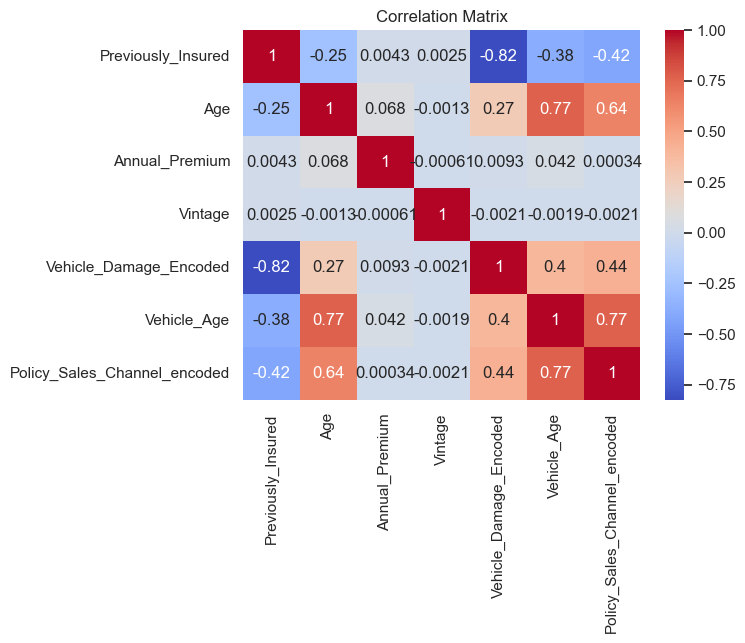

In [373]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### 4.4 Countplot for Response/Churn (Target)

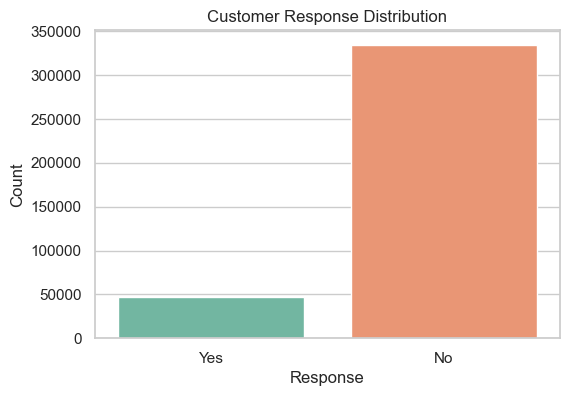

In [375]:
# Map binary values to "No" and "Yes"
df2['Response_Label'] = df2['Response'].map({0: 'No', 1: 'Yes'})

# Create count plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Response_Label', data=df2, palette='Set2')

# Add labels and title
plt.title("Customer Response Distribution")
plt.xlabel("Response")
plt.ylabel("Count")

# Save the plot as an image
plt.savefig("response_countplot.png", dpi=300, bbox_inches='tight')

plt.show()

### 4.5 Scatter plot: Annual_Premium VS Sales Channel(Policy_Sales_channel_encoded)

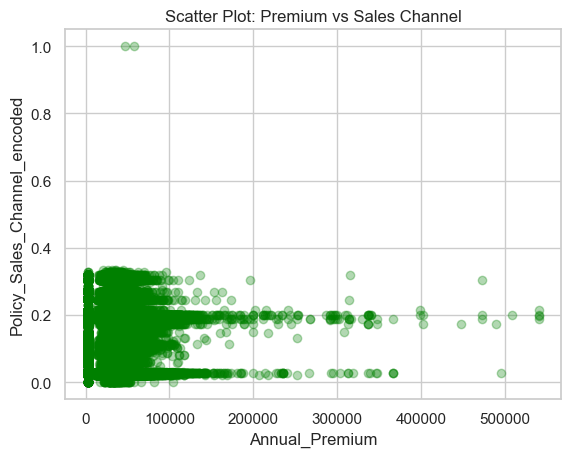

In [377]:
plt.scatter(df2['Annual_Premium'], df2['Policy_Sales_Channel_encoded'], alpha=0.3, color='green')
plt.xlabel('Annual_Premium')
plt.ylabel('Policy_Sales_Channel_encoded')
plt.title('Scatter Plot: Premium vs Sales Channel')
plt.show()

### 4.6 Groupwise Mean Plot: Policy sales VS Annual Premium

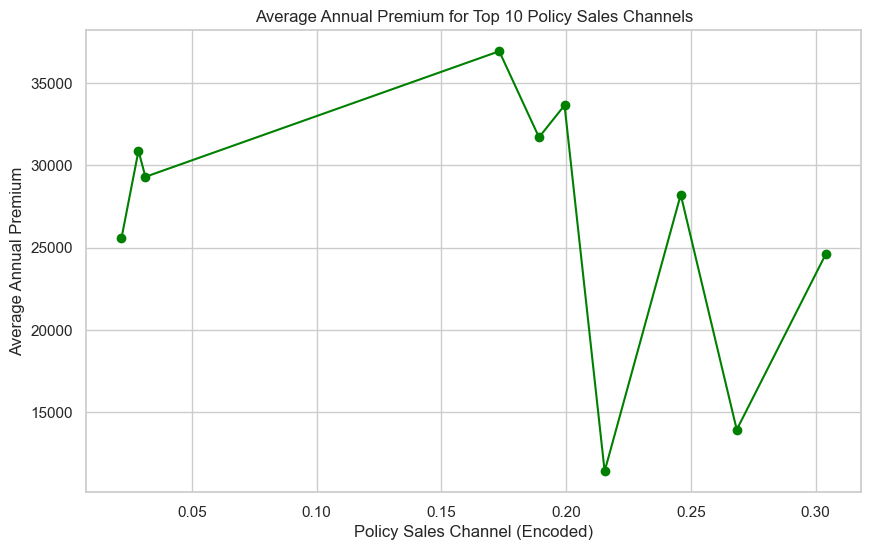

In [379]:
#Need to extract the top ten policy sales channels and plotting them for a clear exploratory analysis

#Find top 10 most frequent channels
top_channels = df2['Policy_Sales_Channel_encoded'].value_counts().nlargest(10).index

#Filter only those top channels
filtered_df = df2[df2['Policy_Sales_Channel_encoded'].isin(top_channels)]

#Group by channel and calculate average premium
grouped = filtered_df.groupby('Policy_Sales_Channel_encoded')['Annual_Premium'].mean().sort_index()

#Plot the trend
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(grouped.index, grouped.values, marker='o', linestyle='-', color='green')
plt.title('Average Annual Premium for Top 10 Policy Sales Channels')
plt.xlabel('Policy Sales Channel (Encoded)')
plt.ylabel('Average Annual Premium')
plt.grid(True)
plt.show()

### 4.7 Distribution of Annual Premium across different Policy Sales Channels 

In [381]:
#ploting this with original Policy channel column which was not encoded from df1 dataframe for better interpretation

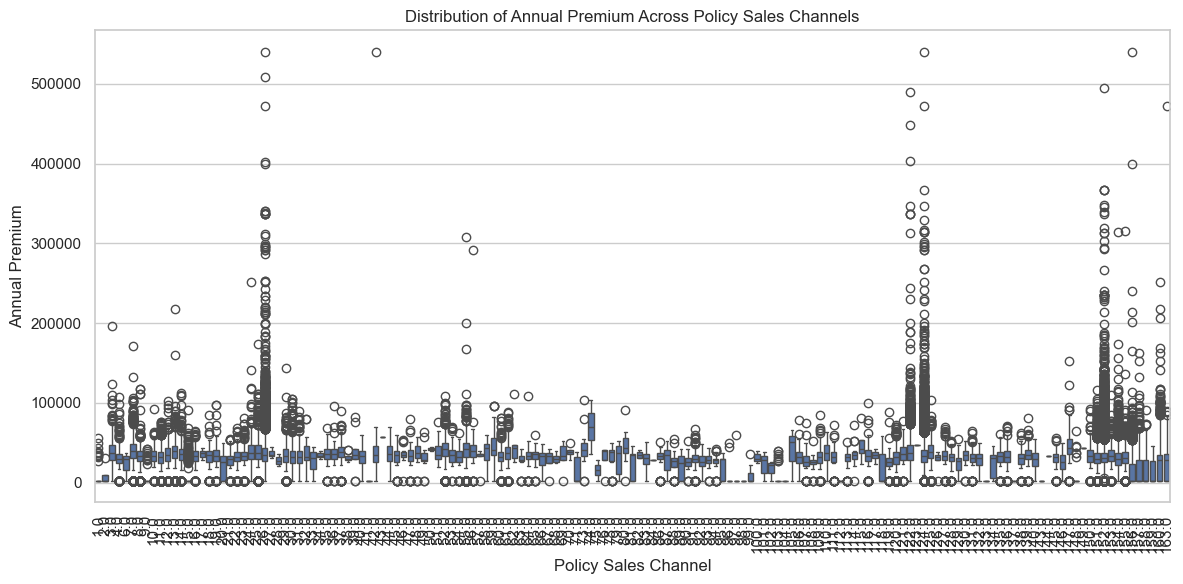

In [382]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1, x='Policy_Sales_Channel', y='Annual_Premium')

plt.title('Distribution of Annual Premium Across Policy Sales Channels')
plt.xlabel('Policy Sales Channel')
plt.ylabel('Annual Premium')
plt.xticks(rotation=90)  # Rotate x-axis labels if there are many channels
plt.tight_layout()
plt.show()

<Axes: xlabel='Policy_Sales_Channel', ylabel='Annual_Premium'>

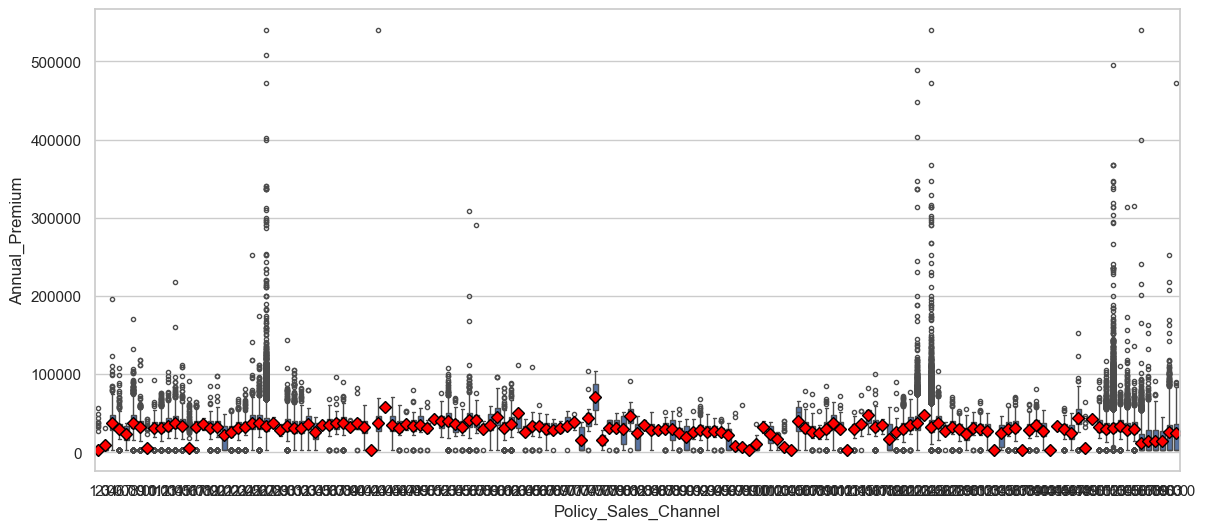

In [383]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df1, x='Policy_Sales_Channel', y='Annual_Premium', showmeans=True,
            meanprops={"marker": "D", "markerfacecolor": "red", "markeredgecolor": "black"},
            flierprops=dict(marker='o', markersize=3))  # Optional: control outlier style

Do similar grouped EDA with Response to see conversion patterns by channel or premium.
Use sns.boxplot() to visualize premium distribution across response or channel.= to do

## Step 5: Feature Importance and Selection

In [386]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [387]:
df2.dtypes

id                                int64
Age                               int64
Driving_License                   int64
Region_Code                     float64
Previously_Insured                int64
Vehicle_Age                       int64
Annual_Premium                  float64
Policy_Sales_Channel            float64
Vintage                           int64
Response                          int64
Gender_Encoded                    int32
Vehicle_Damage_Encoded             bool
Policy_Sales_Channel_encoded    float64
Response_Label                   object
dtype: object

### 5.1 Feature Engineering

#### Multicollinearity Check - Variance Inflation Factor (VIF) 

In [390]:
#Checking VIF due to Multicollinearity of Age, Vehicle_Age, and Policy_Sales_Channel_encoded.
# We usually need to check VIF for all the features that we have selected for model building.

features_for_VIF = ['Age', 'Vehicle_Age', 'Vehicle_Damage_Encoded', 
            'Policy_Sales_Channel_encoded', 'Previously_Insured', 
            'Annual_Premium']

X = df2[features_for_VIF]  # df2 should be the encoded DataFrame
X = add_constant(X)       # Adds intercept term for statsmodels


In [391]:
#I have noticed that VIF can be calculated only with numerical features. Vehicle_Encoded is bool and needs to be converted
# I have not converted Gender_encoded feature to int, because we no need it in model building
df2['Vehicle_Damage_Encoded'] = df2['Vehicle_Damage_Encoded'].astype(int)

In [392]:
df2.to_csv("exported_dataset_encoded.csv", index=False)   #Saving df2

In [393]:
df2.dtypes 

id                                int64
Age                               int64
Driving_License                   int64
Region_Code                     float64
Previously_Insured                int64
Vehicle_Age                       int64
Annual_Premium                  float64
Policy_Sales_Channel            float64
Vintage                           int64
Response                          int64
Gender_Encoded                    int32
Vehicle_Damage_Encoded            int32
Policy_Sales_Channel_encoded    float64
Response_Label                   object
dtype: object

In [394]:
print(X.dtypes)

const                           float64
Age                               int64
Vehicle_Age                       int64
Vehicle_Damage_Encoded             bool
Policy_Sales_Channel_encoded    float64
Previously_Insured                int64
Annual_Premium                  float64
dtype: object


In [395]:
print("NaNs:", X.isna().sum().sum())
print("Infs:", np.isinf(X).sum().sum())   #I was getting error in calculating VIF, so checking NAN/Infs

NaNs: 0
Infs: 0


In [396]:
features_for_VIF = ['Age', 'Vehicle_Age', 'Vehicle_Damage_Encoded', 
            'Policy_Sales_Channel_encoded', 'Previously_Insured', 
            'Annual_Premium']

X = df2[features_for_VIF] 
X = add_constant(X)   
X

,const,Age,Vehicle_Age,Vehicle_Damage_Encoded,Policy_Sales_Channel_encoded,Previously_Insured,Annual_Premium
0,1.0,44,2,1,0.199385,0,40454.0
1,1.0,76,1,0,0.199385,0,33536.0
2,1.0,47,2,1,0.199385,0,38294.0
3,1.0,21,0,0,0.028624,1,28619.0
4,1.0,29,0,0,0.028624,1,27496.0
...,...,...,...,...,...,...,...
381104,1.0,74,1,0,0.199385,1,30170.0
381105,1.0,30,0,0,0.028624,1,40016.0
381106,1.0,21,0,0,0.021810,1,35118.0
381107,1.0,68,2,1,0.189148,0,44617.0


In [397]:
X_with_const = add_constant(X)

#Create VIF dataframe
vif_df = pd.DataFrame()
vif_df["features_for_VIF"] = X_with_const.columns

#Calculate VIF for all columns (including 'const')
vif_df["VIF"] = [variance_inflation_factor(X_with_const.values, i) 
                 for i in range(X_with_const.shape[1])]

print(vif_df)

               features_for_VIF        VIF
0                         const  22.265493
1                           Age   2.483541
2                   Vehicle_Age   3.642565
3        Vehicle_Damage_Encoded   3.227887
4  Policy_Sales_Channel_encoded   2.639029
5            Previously_Insured   3.167649
6                Annual_Premium   1.008557


In [97]:
#1-2 : No multicollinearity
#5-10 : Moderate concern
# >10 : High multicollinearity

### 5.2 Feature Selection

In [99]:
df_new= df2.drop (['id','Region_Code', 'Gender_Encoded','Driving_License','Vintage'],axis=1)

In [100]:
df_new

,Age,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Response,Vehicle_Damage_Encoded,Policy_Sales_Channel_encoded
0,44,0,2,40454.0,26.0,1,1,0.199385
1,76,0,1,33536.0,26.0,0,0,0.199385
2,47,0,2,38294.0,26.0,1,1,0.199385
3,21,1,0,28619.0,152.0,0,0,0.028624
4,29,1,0,27496.0,152.0,0,0,0.028624
...,...,...,...,...,...,...,...,...
381104,74,1,1,30170.0,26.0,0,0,0.199385
381105,30,1,0,40016.0,152.0,0,0,0.028624
381106,21,1,0,35118.0,160.0,0,0,0.021810
381107,68,0,2,44617.0,124.0,0,1,0.189148


In [101]:
df_new.shape 

(381109, 8)

In [102]:
#Now after feature selection there are 12 columns got reduced to 7 columns
#The dataframe, df_new is ready for model building

In [103]:
df_new.describe()

,Age,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Response,Vehicle_Damage_Encoded,Policy_Sales_Channel_encoded
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.458210,0.609616,30564.389581,112.034295,0.122563,0.504877,0.122563
std,15.511611,0.498251,0.567439,17213.155057,54.203995,0.327936,0.499977,0.086388
min,20.000000,0.000000,0.000000,2630.000000,1.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,24405.000000,29.000000,0.000000,0.000000,0.028624
50%,36.000000,0.000000,1.000000,31669.000000,133.000000,0.000000,1.000000,0.173212
75%,49.000000,1.000000,1.000000,39400.000000,152.000000,0.000000,1.000000,0.199385
max,85.000000,1.000000,2.000000,540165.000000,163.000000,1.000000,1.000000,1.000000


In [104]:
df_new.dtypes

Age                               int64
Previously_Insured                int64
Vehicle_Age                       int64
Annual_Premium                  float64
Policy_Sales_Channel            float64
Response                          int64
Vehicle_Damage_Encoded            int32
Policy_Sales_Channel_encoded    float64
dtype: object

## Step 6: Model Building

For my project, I have identified that Logistic regression classifier, decision tree classifier and random forest classier are the suitable models for Churn/ Response analysis...

##### Developing:

##### Logistic Regression Classifier
##### Random Forest Classifier
##### Decision Tree Classifier


#### Step:1 Define Target and Features

In [109]:
# Split the data into features (X) and target (y)
X = df_new.drop('Response', axis=1) #features
y = df_new['Response']              #Target

#### Step:2 Train-Test Split

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)     #Use stratify=y for retaining a balanced class distribution.


#### Step:3 Scaling

In [114]:
from sklearn.preprocessing import StandardScaler

In [115]:
# Standardize the features (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model-1 Logistic Regression Classifier

#### Step:4 Model Training and Evaluation

In [118]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)  # Train the model

LogisticRegression(random_state=42)

In [119]:
y_pred = model.predict(X_test_scaled)  # Predict the class labels for test data

##### 4.1 Evaluation Metrics for Binary classification problems

In [121]:
#Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.88


In [122]:
# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[66823    57]
 [ 9305    37]]


In [123]:
# Classification Report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66880
           1       0.39      0.00      0.01      9342

    accuracy                           0.88     76222
   macro avg       0.64      0.50      0.47     76222
weighted avg       0.82      0.88      0.82     76222



In [124]:
#Row 0 = actual class 0
#Predicted 0: 66765 → True Negatives (TN)
#Predicted 1: 115 → False Positives (FP)
#Row 1 = actual class 1
#Predicted 0: 9275 → False Negatives (FN)
#Predicted 1: 67 → True Positives (TP)

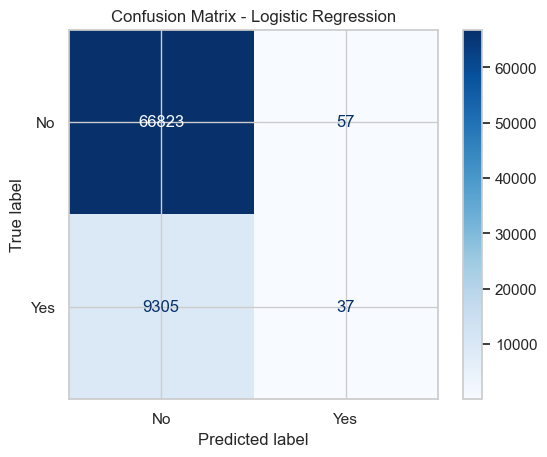

In [125]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                              display_labels=["No", "Yes"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

#### Handling class imbalance

#### a) Handling Class Weights in Logistic regression

In [128]:
#from the above analysis, the classes are imbalance and the model is focusing more on class-0 and neglecting class-1.
#doing class weights to check this case
model = LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [129]:
# Classification Report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66880
           1       0.39      0.00      0.01      9342

    accuracy                           0.88     76222
   macro avg       0.64      0.50      0.47     76222
weighted avg       0.82      0.88      0.82     76222



#### b) SMOTE- Synthetic Minority Oversampling Technique

In [131]:
#since there is no change in classification report even after balancing the class weights, lets try SMOTE with Logistic regression
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

In [132]:
from sklearn.metrics import precision_recall_curve

y_scores = model.predict_proba(X_test)[:, 1]
prec, rec, thresholds = precision_recall_curve(y_test, y_scores)

# Plot or manually set a lower threshold like 0.3
y_pred_new = (y_scores > 0.3).astype(int)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87     66880
           1       0.29      0.53      0.37      9342

    accuracy                           0.78     76222
   macro avg       0.61      0.67      0.62     76222
weighted avg       0.85      0.78      0.81     76222



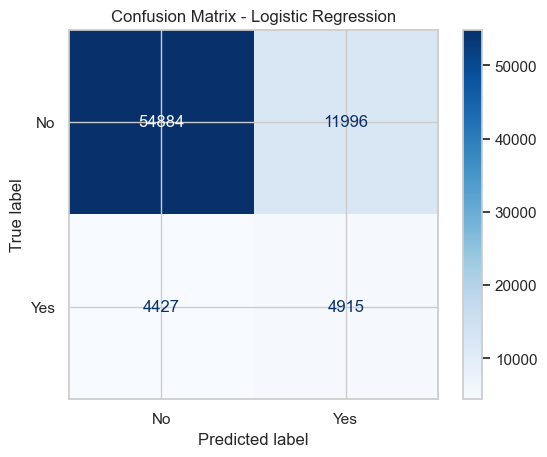

In [422]:
# Classification Report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                              display_labels=["No", "Yes"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

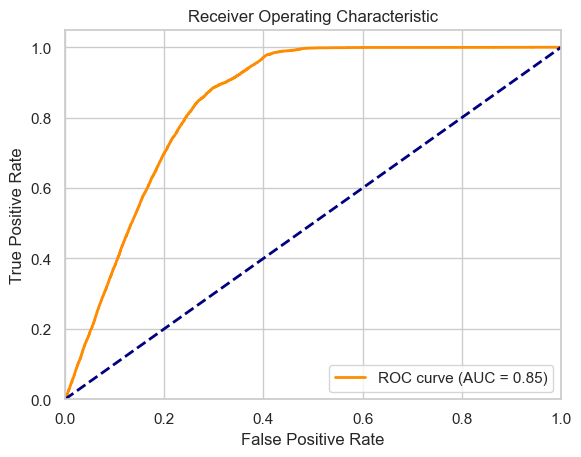

In [134]:
# ROC Curve and AUC
y_pred_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### Model-2 Decision Tree Classifier

Accuracy: 0.78
Precision: 0.85
Recall: 0.78
F1 Score: 0.81
Confusion Matrix:
[[54882 11998]
 [ 4440  4902]]


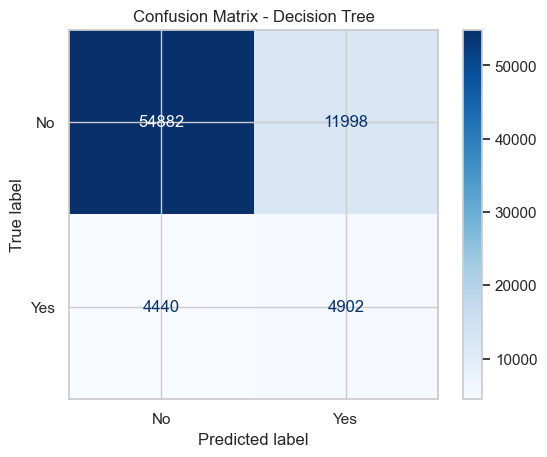

In [136]:
# Create a decision tree classifier
model_2 = DecisionTreeClassifier()
# Train the decision tree model
model_2.fit(X_resampled, y_resampled)
# Make predictions on the testing set
y_pred = model_2.predict(X_test)
# Evaluate the model's performance
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_final = metrics.f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_final:.2f}")
# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                              display_labels=["No", "Yes"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

#### Visualize the Decision tree

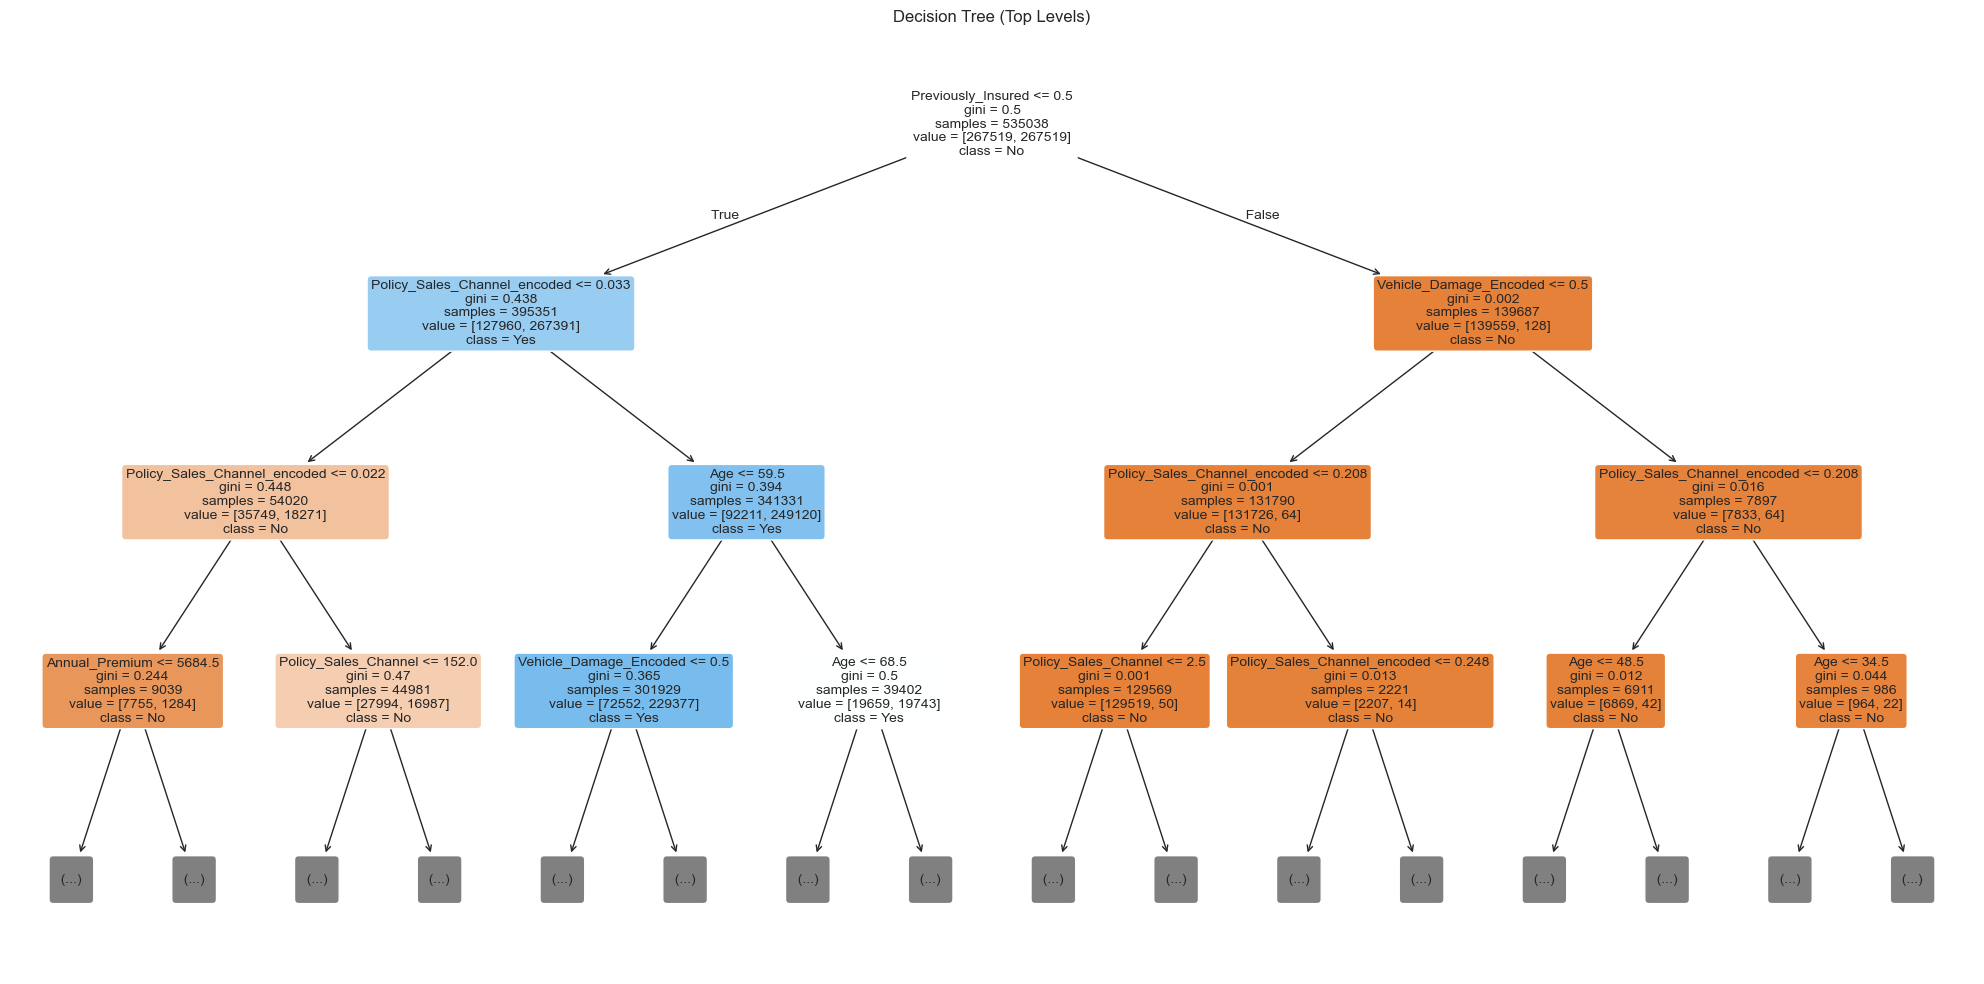

In [138]:
# Trim feature names if needed
feature_names = X.columns[:model_2.n_features_in_]

# Plot only first few levels of the tree (e.g., top 3)
plt.figure(figsize=(20, 10))
plot_tree(model_2,
          feature_names=feature_names,
          class_names=["No", "Yes"],
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=3)   #Limit depth to top 3 levels
plt.title("Decision Tree (Top Levels)")
plt.tight_layout()
plt.savefig("decision_tree_visual.png", dpi=300)        #Save and export
plt.show()

In [139]:
#Facing a problem of class imbalance from the above representation


# HYPER PARAMETER TUNING USING GRID SEARCH AND CROSS VALIDATION- Decision Tree

In [141]:
# this is done to improve the accuracy and balance the classes
# Step 1: Define hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Step 2: Initialize Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)

# Step 3: Set up Grid Search
grid_search = GridSearchCV(
    estimator=dtree,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Step 4: Fit Grid Search on training data
grid_search.fit(X_resampled, y_resampled)

# Step 5: Extract best model
best_model = grid_search.best_estimator_

# Step 6: Make predictions
y_pred = best_model.predict(X_test)

# Step 7: Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1_final = f1_score(y_test, y_pred, average='weighted')

# Step 8: Print results
print("\nBest Parameters from Grid Search:", grid_search.best_params_)
print("\nEvaluation Metrics on Test Set:")
print(f"Accuracy  : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall    : {recall:.2f}")
print(f"F1 Score  : {f1_final:.2f}")

# Optional: detailed classification report
print("\nDetailed Classification Report:\n")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best Parameters from Grid Search: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Evaluation Metrics on Test Set:
Accuracy  : 0.78
Precision : 0.85
Recall    : 0.78
F1 Score  : 0.81

Detailed Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.82      0.87     66880
           1       0.29      0.53      0.38      9342

    accuracy                           0.78     76222
   macro avg       0.61      0.67      0.62     76222
weighted avg       0.85      0.78      0.81     76222



Accuracy: 0.78
Precision: 0.85
Recall: 0.78
F1 Score: 0.81
Confusion Matrix:
[[54884 11996]
 [ 4427  4915]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87     66880
           1       0.29      0.53      0.37      9342

    accuracy                           0.78     76222
   macro avg       0.61      0.67      0.62     76222
weighted avg       0.85      0.78      0.81     76222



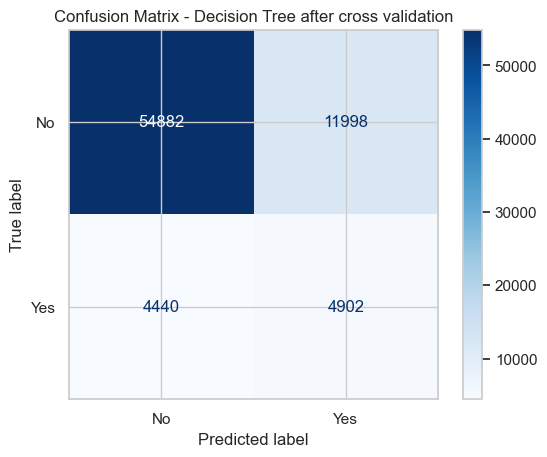

In [142]:
# Then train your decision tree on the balanced data
model_2 = DecisionTreeClassifier()
model_2.fit(X_resampled, y_resampled)

#Make predictions
y_pred = model_2.predict(X_test)
# Evaluate the model's performance
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")
# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

# Classification Report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

#Matrix display
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Decision Tree after cross validation")
plt.show()

### Model- 3 Random Forest Classifier

Random Forest Metrics:
Accuracy_rf: 0.78
Precision_rf: 0.85
Recall_rf: 0.78
F1 Score_rf: 0.80
Confusion Matrix:
[[53870 13010]
 [ 4062  5280]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.86     66880
           1       0.29      0.57      0.38      9342

    accuracy                           0.78     76222
   macro avg       0.61      0.69      0.62     76222
weighted avg       0.85      0.78      0.80     76222



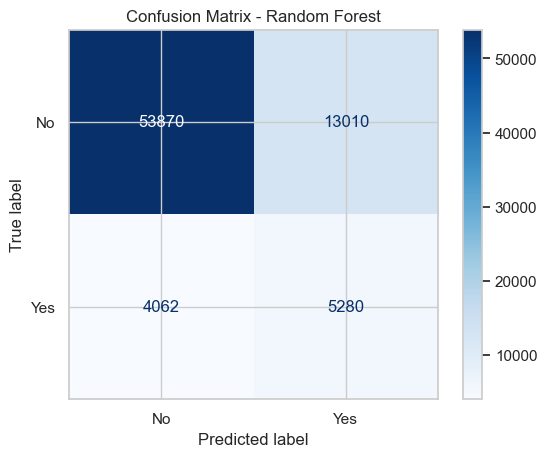

In [144]:
# Create and train a Random Forest classifier
model_3 = RandomForestClassifier(n_estimators=100, random_state=42)
model_3.fit(X_resampled, y_resampled)
# Make predictions using Random Forest
RF_y_pred = model_3.predict(X_test)
# Evaluate Random Forest model
rf_accuracy = metrics.accuracy_score(y_test, RF_y_pred)
rf_precision = metrics.precision_score(y_test, RF_y_pred, average='weighted')
rf_recall = metrics.recall_score(y_test, RF_y_pred, average='weighted')
rf_f1_score = metrics.f1_score(y_test, RF_y_pred, average='weighted')

# Print evaluation metrics for Random Forest
print("Random Forest Metrics:")
print(f"Accuracy_rf: {rf_accuracy:.2f}")
print(f"Precision_rf: {rf_precision:.2f}")
print(f"Recall_rf: {rf_recall:.2f}")
print(f"F1 Score_rf: {rf_f1_score:.2f}")
# Confusion Matrix
confusion = confusion_matrix(y_test, RF_y_pred)
print('Confusion Matrix:')
print(confusion)

# Classification Report
classification_rep = classification_report(y_test, RF_y_pred)
print('Classification Report:')
print(classification_rep)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, RF_y_pred),
                              display_labels=["No", "Yes"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

## HYPER PARAMETER TUNING USING GRID SEARCH- Random Forest 

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Confusion Matrix:
[[51248 15632]
 [ 2449  6893]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.77      0.85     66880
           1       0.31      0.74      0.43      9342

    accuracy                           0.76     76222
   macro avg       0.63      0.75      0.64     76222
weighted avg       0.87      0.76      0.80     76222



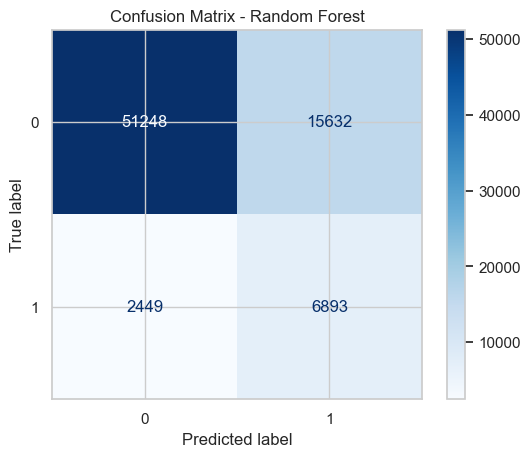

In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

#  Step 1: Define a light hyperparameter grid
param_grid = {
    'n_estimators': [100],               # number of trees
    'max_depth': [10, 20],               # limit tree depth
    'min_samples_split': [2],            # min samples to split
    'min_samples_leaf': [1],             # min samples at leaf
}

#  Step 2: Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

#  Step 3: Setup GridSearchCV (with only 3 folds)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,                      # fewer folds = faster
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

#  Step 4: Fit on training data
grid_search.fit(X_resampled, y_resampled)

# Step 5: Use best model to predict
best_rf = grid_search.best_estimator_
RF_y_pred = best_rf.predict(X_test)

#  Step 6: Metrics
print("Best Parameters:", grid_search.best_params_)

print("\nConfusion Matrix:")
confusion = confusion_matrix(y_test, RF_y_pred)
print(confusion)

print("\nClassification Report:")
print(classification_report(y_test, RF_y_pred))

#  Step 7: Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion,
                              display_labels=best_rf.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()


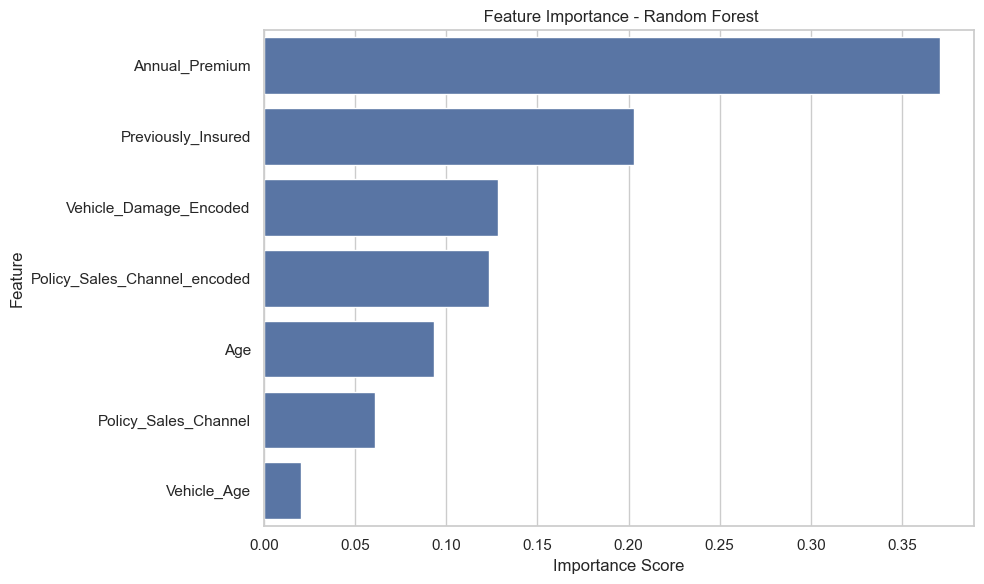

In [147]:
#feature importance representation
importances = model_3.feature_importances_

features = pd.Series(importances, index=X.columns)


plt.figure(figsize=(10, 6))
sns.barplot(x=features.sort_values(ascending=False), y=features.sort_values(ascending=False).index)
plt.title(" Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## Step 7: Model Accuracy Comparison

Text(0, 0.5, 'Accuracy')

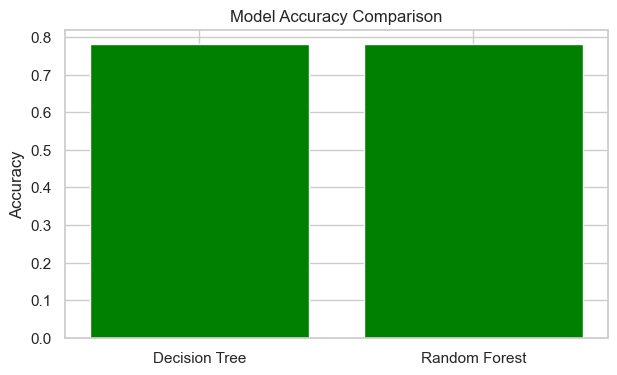

In [149]:
models = ["Decision Tree", "Random Forest"]
accuracy = [0.78, 0.78]
f1_weighted = [0.81, 0.80]

plt.figure(figsize=(7,4))
plt.bar(models, accuracy, color='green')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")